Assignment 1
Group 10: Rachel Ye (#30732994),Chion Kim(#87525523)，Pranav Mehta(19184282),Chenyang Jiang(71396428)

### Q1 Part a:
### Sets and Indices
- Let **$I$** denote the set of source locations (indexed by $i$), with $i = 1, 2, \dots, 15$.
- Let **$J$** denote the set of market locations (indexed by $j$), with $j = 1, 2, \dots, 10$.
- Let **$M$** denote the transportation mode set, with $m = \text{truck}$ or $m = \text{rail}$.

### Parameters
- **$S_i$**: Annual supply at source location $i$.
- **$D_j$**: Annual demand at market location $j$.
- **$c_{ijm}$**: Unit cost of transporting lumber from source $i$ to market $j$ using mode $m$.
- **$L_{im}$**: Limit on the amount of lumber that can be loaded onto trains at source $i$.

### Decision Variables
- **$x_{ijm}$**: Quantity of lumber transported from source $i$ to market $j$ using mode $m$.

### Objective
Minimize the total transportation cost:
$$
\text{Minimize} \quad \sum_{i \in I} \sum_{j \in J} \sum_{m \in M} c_{ijm} x_{ijm}
$$

### Constraints
1. **Supply Constraint**: Total lumber transported from each source should not exceed its supply.
   $$
   \sum_{j \in J} \sum_{m \in M} x_{ijm} \leq S_i, \quad \forall i \in I
   $$

2. **Demand Constraint**: Total lumber delivered to each market should meet its demand.

   $$
   \sum_{i \in I} \sum_{m \in M} x_{ijm} = D_j, \quad \forall j \in J
   $$


3. **Rail Loading Limit**: The amount transported by rail from each source cannot exceed its loading limit.
   $$
   \sum_{j \in J} x_{ij, \text{rail}} \leq L_{i, \text{rail}}, \quad \forall i \in I
   $$

4. **Non-negativity**: All transport quantities must be non-negative.
   $$
   x_{ijm} \geq 0, \quad \forall i \in I, j \in J, m \in M
   $$


### Q1 Part b with Gurobi Soultion:

In [1]:
import pandas as pd
from gurobipy import Model, GRB, quicksum

# Define sets and indices based on the provided data
sources = range(1, 16)  # Source locations (1 to 15)
markets = range(1, 11)  # Market locations (1 to 10)
modes = ['truck', 'rail']  # Transportation modes

# 1. Supply data
S = {
    1: 16, 2: 26, 3: 24, 4: 19, 5: 22, 6: 30, 7: 24, 8: 11, 9: 26, 10: 24,
    11: 30, 12: 22, 13: 17, 14: 11, 15: 23
}

# 2. Demand data
D = {
    1: 36, 2: 33, 3: 30, 4: 36, 5: 37, 6: 22, 7: 30, 8: 35, 9: 28, 10: 38
}

# 3. Unit cost data by truck (replace with actual data based on provided table)
cost_truck = {
    (1, 1): 96, (1, 2): 84, (1, 3): 84, (1, 4): 53, (1, 5): 81, (1, 6): 86, (1, 7): 64, (1, 8): 51, (1, 9): 50, (1, 10): 71,
    (2, 1): 79, (2, 2): 58, (2, 3): 78, (2, 4): 86, (2, 5): 88, (2, 6): 97, (2, 7): 77, (2, 8): 61, (2, 9): 89, (2, 10): 65,
    (3, 1): 61, (3, 2): 53, (3, 3): 62, (3, 4): 90, (3, 5): 68, (3, 6): 76, (3, 7): 93, (3, 8): 71, (3, 9): 83, (3, 10): 52,
    (4, 1): 70, (4, 2): 85, (4, 3): 100, (4, 4): 96, (4, 5): 74, (4, 6): 75, (4, 7): 77, (4, 8): 65, (4, 9): 73, (4, 10): 74,
    (5, 1): 82, (5, 2): 74, (5, 3): 82, (5, 4): 56, (5, 5): 66, (5, 6): 82, (5, 7): 89, (5, 8): 68, (5, 9): 82, (5, 10): 71,
    (6, 1): 54, (6, 2): 74, (6, 3): 60, (6, 4): 63, (6, 5): 92, (6, 6): 53, (6, 7): 57, (6, 8): 84, (6, 9): 76, (6, 10): 53,
    (7, 1): 70, (7, 2): 73, (7, 3): 57, (7, 4): 96, (7, 5): 79, (7, 6): 85, (7, 7): 67, (7, 8): 92, (7, 9): 52, (7, 10): 94,
    (8, 1): 52, (8, 2): 94, (8, 3): 75, (8, 4): 50, (8, 5): 82, (8, 6): 83, (8, 7): 54, (8, 8): 69, (8, 9): 63, (8, 10): 95,
    (9, 1): 66, (9, 2): 65, (9, 3): 53, (9, 4): 86, (9, 5): 78, (9, 6): 99, (9, 7): 87, (9, 8): 80, (9, 9): 53, (9, 10): 66,
    (10, 1): 55, (10, 2): 92, (10, 3): 75, (10, 4): 68, (10, 5): 66, (10, 6): 96, (10, 7): 51, (10, 8): 76, (10, 9): 62, (10, 10): 59,
    (11, 1): 55, (11, 2): 57, (11, 3): 83, (11, 4): 92, (11, 5): 80, (11, 6): 74, (11, 7): 68, (11, 8): 75, (11, 9): 74, (11, 10): 77,
    (12, 1): 69, (12, 2): 58, (12, 3): 74, (12, 4): 90, (12, 5): 64, (12, 6): 82, (12, 7): 60, (12, 8): 51, (12, 9): 62, (12, 10): 69,
    (13, 1): 87, (13, 2): 93, (13, 3): 80, (13, 4): 86, (13, 5): 88, (13, 6): 71, (13, 7): 65, (13, 8): 96, (13, 9): 59, (13, 10): 80,
    (14, 1): 96, (14, 2): 57, (14, 3): 63, (14, 4): 73, (14, 5): 75, (14, 6): 85, (14, 7): 60, (14, 8): 51, (14, 9): 54, (14, 10): 96,
    (15, 1): 83, (15, 2): 55, (15, 3): 72, (15, 4): 92, (15, 5): 88, (15, 6): 66, (15, 7): 82, (15, 8): 87, (15, 9): 81, (15, 10): 71
}


# 4. Unit cost data by rail, handling "X" values by setting them to a high cost
# Define the cost_rail dictionary without including pairs marked with "X"
cost_rail = {
    (1, 1): 40, (1, 2): 46, (1, 3): 50, (1, 4): 42, (1, 5): 40, (1, 6): 34, (1, 7): 33, (1, 8): 35, (1, 9): 27, (1, 10): 45,
    (2, 1): 45, (2, 3): 25, (2, 4): 36, (2, 5): 32, (2, 6): 36, (2, 7): 49, (2, 9): 38, (2, 10): 48,
    (3, 2): 30, (3, 3): 28, (3, 5): 31, (3, 7): 31, (3, 8): 35,
    (4, 1): 48, (4, 2): 49, (4, 3): 27, (4, 4): 34, (4, 5): 50, (4, 6): 27, (4, 7): 25, (4, 8): 36, (4, 9): 32, (4, 10): 31,
    (5, 1): 47, (5, 2): 40, (5, 3): 25, (5, 4): 34, (5, 5): 30, (5, 6): 39, (5, 7): 34, (5, 9): 27, (5, 10): 49,
    (6, 1): 40, (6, 2): 41, (6, 3): 47, (6, 5): 47, (6, 6): 46, (6, 7): 40, (6, 8): 50, (6, 9): 42, (6, 10): 42,
    (7, 1): 45, (7, 4): 35, (7, 6): 41, (7, 7): 28, (7, 8): 38, (7, 9): 36, (7, 10): 47,
    (8, 1): 39, (8, 2): 39, (8, 3): 43, (8, 4): 30, (8, 5): 43, (8, 7): 34, (8, 8): 32, (8, 9): 43, (8, 10): 34,
    (9, 2): 39, (9, 3): 44, (9, 4): 47, (9, 5): 26, (9, 6): 30, (9, 7): 31, (9, 9): 46, (9, 10): 28,
    (10, 1): 40, (10, 2): 28, (10, 3): 45, (10, 4): 39, (10, 5): 50, (10, 6): 33, (10, 8): 45, (10, 9): 43, (10, 10): 28,
    (11, 1): 32, (11, 2): 44, (11, 3): 45, (11, 5): 44, (11, 6): 37, (11, 7): 45, (11, 8): 31, (11, 9): 45, (11, 10): 45,
    (12, 1): 29, (12, 2): 30, (12, 3): 29, (12, 4): 40, (12, 5): 25, (12, 6): 39, (12, 7): 45, (12, 9): 33,
    (13, 1): 33, (13, 2): 39, (13, 3): 30, (13, 4): 47, (13, 6): 33, (13, 7): 50, (13, 8): 40, (13, 9): 50, (13, 10): 33,
    (14, 2): 41, (14, 3): 35, (14, 4): 28, (14, 5): 30, (14, 6): 31, (14, 8): 30, (14, 9): 35, (14, 10): 30,
    (15, 1): 47, (15, 2): 44, (15, 3): 31, (15, 4): 32, (15, 5): 40, (15, 6): 47, (15, 7): 42, (15, 8): 35, (15, 9): 40, (15, 10): 48
}


# 5. Rail capacity limits
rail_limits = {
    (1, 1): 1, (1, 2): 2, (1, 3): 3, (1, 4): 1, (1, 5): 1, (1, 6): 1, (1, 7): 1, (1, 8): 3, (1, 9): 2, (1, 10): 1,
    (2, 1): 3, (2, 2): 0, (2, 3): 1, (2, 4): 1, (2, 5): 1, (2, 6): 3, (2, 7): 2, (2, 8): 0, (2, 9): 2, (2, 10): 3,
    (3, 1): 0, (3, 2): 2, (3, 3): 2, (3, 4): 0, (3, 5): 2, (3, 6): 0, (3, 7): 2, (3, 8): 1, (3, 9): 0, (3, 10): 0,
    (4, 1): 3, (4, 2): 2, (4, 3): 2, (4, 4): 3, (4, 5): 3, (4, 6): 1, (4, 7): 3, (4, 8): 3, (4, 9): 2, (4, 10): 2,
    (5, 1): 1, (5, 2): 3, (5, 3): 3, (5, 4): 1, (5, 5): 2, (5, 6): 1, (5, 7): 3, (5, 8): 0, (5, 9): 3, (5, 10): 2,
    (6, 1): 1, (6, 2): 1, (6, 3): 3, (6, 4): 0, (6, 5): 3, (6, 6): 3, (6, 7): 2, (6, 8): 2, (6, 9): 2, (6, 10): 2,
    (7, 1): 1, (7, 2): 0, (7, 3): 0, (7, 4): 2, (7, 5): 0, (7, 6): 3, (7, 7): 2, (7, 8): 2, (7, 9): 3, (7, 10): 2,
    (8, 1): 2, (8, 2): 1, (8, 3): 1, (8, 4): 1, (8, 5): 1, (8, 6): 0, (8, 7): 2, (8, 8): 2, (8, 9): 1, (8, 10): 1,
    (9, 1): 0, (9, 2): 2, (9, 3): 1, (9, 4): 2, (9, 5): 1, (9, 6): 3, (9, 7): 1, (9, 8): 0, (9, 9): 3, (9, 10): 1,
    (10, 1): 3, (10, 2): 1, (10, 3): 1, (10, 4): 1, (10, 5): 1, (10, 6): 1, (10, 7): 0, (10, 8): 2, (10, 9): 1, (10, 10): 3,
    (11, 1): 2, (11, 2): 1, (11, 3): 2, (11, 4): 0, (11, 5): 2, (11, 6): 3, (11, 7): 2, (11, 8): 1, (11, 9): 1, (11, 10): 1,
    (12, 1): 2, (12, 2): 2, (12, 3): 1, (12, 4): 1, (12, 5): 2, (12, 6): 3, (12, 7): 3, (12, 8): 0, (12, 9): 1, (12, 10): 0,
    (13, 1): 2, (13, 2): 3, (13, 3): 2, (13, 4): 3, (13, 5): 0, (13, 6): 2, (13, 7): 1, (13, 8): 3, (13, 9): 2, (13, 10): 3,
    (14, 1): 0, (14, 2): 3, (14, 3): 1, (14, 4): 1, (14, 5): 2, (14, 6): 3, (14, 7): 0, (14, 8): 1, (14, 9): 1, (14, 10): 1,
    (15, 1): 3, (15, 2): 3, (15, 3): 1, (15, 4): 1, (15, 5): 1, (15, 6): 1, (15, 7): 2, (15, 8): 3, (15, 9): 3, (15, 10): 3
}


# Initialize the Gurobi model
model = Model("Loggy_Lumber_Transport")

# Decision variables: Quantity transported from source i to market j using mode m
x = model.addVars(sources, markets, modes, vtype=GRB.CONTINUOUS, name="x")

# Objective function: Minimize total transportation cost
model.setObjective(
    quicksum(cost_truck[i, j] * x[i, j, 'truck'] for i in sources for j in markets) +
    quicksum(cost_rail[i, j] * x[i, j, 'rail'] for i in sources for j in markets if (i, j) in cost_rail),
    GRB.MINIMIZE
)

# Constraints

# 1. Supply constraints: Total transported from each source should not exceed its supply
for i in sources:
    model.addConstr(
        quicksum(x[i, j, m] for j in markets for m in modes) <= S[i],
        name=f"Supply_{i}"
    )

# 2. Demand constraints: Total delivered to each market should meet its demand
for j in markets:
    model.addConstr(
        quicksum(x[i, j, m] for i in sources for m in modes) == D[j],
        name=f"Demand_{j}"
    )

# 3. Rail capacity limits: Quantity by rail from each source to each market should not exceed the rail limit
for i in sources:
    for j in markets:
        if (i, j) in rail_limits:
            model.addConstr(
                x[i, j, 'rail'] <= rail_limits[i, j],
                name=f"RailLimit_{i}_{j}"
            )

# Optimize the model
model.optimize()

# Display the optimal cost and decision variables
if model.status == GRB.OPTIMAL:
    print(f"Optimal total cost: {round(model.objVal, 2)}")
    print("Optimal solution:")
    solution = model.getAttr('x', x)
    for i in sources:
        for j in markets:
            for m in modes:
                if solution[i, j, m] > 0:
                    print(f"x[{i},{j},{m}] = {round(solution[i, j, m], 2)}")
else:
    print("No optimal solution found.")


Set parameter Username
Academic license - for non-commercial use only - expires 2025-08-31
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (win64 - Windows 11.0 (22631.2))

CPU model: 13th Gen Intel(R) Core(TM) i7-13700H, instruction set [SSE2|AVX|AVX2]
Thread count: 14 physical cores, 20 logical processors, using up to 20 threads

Optimize a model with 175 rows, 300 columns and 750 nonzeros
Model fingerprint: 0x716430a3
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e+01, 1e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 4e+01]
Presolve removed 150 rows and 22 columns
Presolve time: 0.02s
Presolved: 25 rows, 278 columns, 556 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    8.8650000e+03   2.455000e+02   0.000000e+00      0s
      33    1.4210000e+04   0.000000e+00   0.000000e+00      0s

Solved in 33 iterations and 0.03 seconds (0.00 work units)
Optimal objective  1.421000000e+04
Optimal total cost

### Optimization Results for Minimum Cost and Transportation Decisions

The optimization yields an **optimal total cost of $14,210.00**. Below is a detailed breakdown of the transportation quantities (in units of 1 million board feet) from each source to each market, specifying the mode of transport (truck or rail).

**Optimal Total Cost**: $14,210.00

#### Transportation Decisions (Quantity by Mode)
- **Source 1**
  - Market 1: Rail - 1.0
  - Market 4: Truck - 6.0, Rail - 1.0
  - Market 5: Rail - 1.0
  - Market 6: Rail - 1.0
  - Market 7: Rail - 1.0
  - Market 8: Rail - 3.0
  - Market 9: Rail - 2.0
  
- **Source 2**
  - Market 1: Rail - 3.0
  - Market 2: Truck - 5.0
  - Market 3: Rail - 1.0
  - Market 4: Rail - 1.0
  - Market 5: Rail - 1.0
  - Market 6: Rail - 3.0
  - Market 7: Rail - 2.0
  - Market 8: Truck - 5.0
  - Market 9: Rail - 2.0
  - Market 10: Rail - 3.0
  
- **Source 3**
  - Market 2: Truck - 3.0, Rail - 2.0
  - Market 3: Rail - 2.0
  - Market 5: Truck - 8.0, Rail - 2.0
  - Market 7: Rail - 2.0
  - Market 8: Rail - 1.0
  - Market 10: Truck - 4.0

- **Source 4**
  - Market 3: Rail - 2.0
  - Market 4: Rail - 3.0
  - Market 5: Rail - 3.0
  - Market 6: Rail - 1.0
  - Market 7: Rail - 3.0
  - Market 8: Rail - 3.0
  - Market 9: Rail - 2.0
  - Market 10: Rail - 2.0
  
- **Source 5**
  - Market 2: Rail - 3.0
  - Market 3: Rail - 3.0
  - Market 4: Truck - 7.0, Rail - 1.0
  - Market 5: Rail - 2.0
  - Market 7: Rail - 3.0
  - Market 9: Rail - 3.0
  
- **Source 6**
  - Market 1: Rail - 1.0
  - Market 2: Rail - 1.0
  - Market 3: Rail - 3.0
  - Market 4: Truck - 4.0
  - Market 5: Rail - 3.0
  - Market 7: Rail - 2.0
  - Market 8: Rail - 2.0
  - Market 10: Truck - 12.0, Rail - 2.0
  
- **Source 7**
  - Market 1: Rail - 1.0
  - Market 4: Rail - 2.0
  - Market 6: Rail - 3.0
  - Market 7: Rail - 2.0
  - Market 8: Rail - 2.0
  - Market 9: Truck - 9.0, Rail - 3.0
  - Market 10: Rail - 2.0
  
- **Source 8**
  - Market 1: Rail - 2.0
  - Market 2: Rail - 1.0
  - Market 4: Truck - 1.0, Rail - 1.0
  - Market 5: Rail - 1.0
  - Market 7: Rail - 2.0
  - Market 8: Rail - 2.0
  - Market 10: Rail - 1.0
  
- **Source 9**
  - Market 2: Rail - 2.0
  - Market 3: Truck - 12.0, Rail - 1.0
  - Market 4: Rail - 2.0
  - Market 5: Rail - 1.0
  - Market 6: Rail - 3.0
  - Market 7: Rail - 1.0
  - Market 9: Rail - 3.0
  - Market 10: Rail - 1.0

- **Source 10**
  - Market 1: Rail - 3.0
  - Market 2: Rail - 1.0
  - Market 4: Rail - 1.0
  - Market 5: Truck - 7.0, Rail - 1.0
  - Market 6: Rail - 1.0
  - Market 7: Truck - 5.0
  - Market 8: Rail - 2.0
  - Market 10: Rail - 3.0

- **Source 11**
  - Market 1: Truck - 16.0, Rail - 2.0
  - Market 2: Rail - 1.0
  - Market 3: Rail - 2.0
  - Market 5: Rail - 2.0
  - Market 6: Rail - 3.0
  - Market 7: Rail - 2.0
  - Market 8: Rail - 1.0
  - Market 10: Rail - 1.0
  
- **Source 12**
  - Market 1: Rail - 2.0
  - Market 2: Rail - 2.0
  - Market 3: Rail - 1.0
  - Market 4: Rail - 1.0
  - Market 5: Rail - 2.0
  - Market 6: Rail - 3.0
  - Market 7: Rail - 3.0
  - Market 8: Truck - 7.0
  - Market 9: Rail - 1.0

- **Source 13**
  - Market 1: Rail - 2.0
  - Market 2: Rail - 3.0
  - Market 3: Rail - 2.0
  - Market 4: Rail - 3.0
  - Market 6: Rail - 1.0
  - Market 8: Rail - 3.0
  - Market 10: Rail - 3.0

- **Source 14**
  - Market 2: Rail - 3.0
  - Market 4: Rail - 1.0
  - Market 5: Rail - 2.0
  - Market 6: Rail - 3.0
  - Market 8: Rail - 1.0
  - Market 10: Rail - 1.0

- **Source 15**
  - Market 1: Rail - 3.0
  - Market 2: Truck - 3.0, Rail - 3.0
  - Market 3: Rail - 1.0
  - Market 4: Rail - 1.0
  - Market 5: Rail - 1.0
  - Market 7: Rail - 2.0
  - Market 8: Rail - 3.0
  - Market 9: Rail - 3.0
  - Market 10: Rail - 3.0


### Q1 Part c High-Level Observations :

1. **Optimized Transportation Cost**: The optimal total cost of \$14,210 is achieved by strategically assigning shipments via either truck or rail, depending on the cost-effectiveness for each source-market pair. This model shows that a balanced approach between truck and rail transportation, based on the cost data, can result in significant cost savings.

2. **Preference for Rail over Truck**: In most cases, rail is preferred over truck due to its generally lower per-unit cost, where feasible. Rail transportation was selected in numerous allocations, particularly for longer distances, where cost savings can accumulate due to the lower costs associated with rail. This suggests that whenever possible, Loggy Lumber should prioritize rail for distant markets to minimize costs.

3. **Constraints on Rail Shipments**: The "X" values in the rail cost table indicate certain source-market pairs where rail shipment is not an option. For these pairs, truck transportation is mandatory, leading to higher costs in some cases. Loggy Lumber may consider investigating alternative rail options or negotiating with rail providers to expand rail service availability to more markets, potentially reducing costs further. The details will be provided in question d.

4. **Strategic Use of Trucks for Specific Markets**: For markets where truck transport is used, the model allocates it where it is either more economical or where rail is unavailable. Trucks are mainly used in local or regional distributions (e.g., shorter distances where rail is unavailable or impractical), making them a secondary yet essential component in the transportation strategy. This insight supports a diversified transportation strategy where trucks play a crucial role in fulfilling demand that rail cannot accommodate.

5. **High-Cost Source-Market Pairs**: Some allocations in the model indicate higher per-unit costs, likely reflecting challenging logistics or less accessible markets. These markets may require special attention, and management could consider whether any adjustments in supply sourcing, route optimization, or price negotiations might further reduce costs.

6. **Increase flexibility in key sources**: According to the above analysis, some of the source locations are almost used up in order to save costs and achieve optimized transportation costs. However, in the real world, it decreases the flexibility of the whole supply chain and increases the risk of uncertainty. The suggestion is that the managerial team should consider adding new suppliers close to these busy positions under the premise of acceptable cost. 


### Q1 Part d:

In [3]:
import pandas as pd
from gurobipy import Model, GRB, quicksum

# Define sets and indices based on the provided data
sources = range(1, 16)  # Source locations (1 to 15)
markets = range(1, 11)  # Market locations (1 to 10)
modes = ['truck', 'rail']  # Transportation modes

# Supply data
S = {
    1: 16, 2: 26, 3: 24, 4: 19, 5: 22, 6: 30, 7: 24, 8: 11, 9: 26, 10: 24,
    11: 30, 12: 22, 13: 17, 14: 11, 15: 23
}

# Demand data
D = {
    1: 36, 2: 33, 3: 30, 4: 36, 5: 37, 6: 22, 7: 30, 8: 35, 9: 28, 10: 38
}

# 3. Unit cost data by truck and rail
cost_truck =  {
    (1, 1): 96, (1, 2): 84, (1, 3): 84, (1, 4): 53, (1, 5): 81, (1, 6): 86, (1, 7): 64, (1, 8): 51, (1, 9): 50, (1, 10): 71,
    (2, 1): 79, (2, 2): 58, (2, 3): 78, (2, 4): 86, (2, 5): 88, (2, 6): 97, (2, 7): 77, (2, 8): 61, (2, 9): 89, (2, 10): 65,
    (3, 1): 61, (3, 2): 53, (3, 3): 62, (3, 4): 90, (3, 5): 68, (3, 6): 76, (3, 7): 93, (3, 8): 71, (3, 9): 83, (3, 10): 52,
    (4, 1): 70, (4, 2): 85, (4, 3): 100, (4, 4): 96, (4, 5): 74, (4, 6): 75, (4, 7): 77, (4, 8): 65, (4, 9): 73, (4, 10): 74,
    (5, 1): 82, (5, 2): 74, (5, 3): 82, (5, 4): 56, (5, 5): 66, (5, 6): 82, (5, 7): 89, (5, 8): 68, (5, 9): 82, (5, 10): 71,
    (6, 1): 54, (6, 2): 74, (6, 3): 60, (6, 4): 63, (6, 5): 92, (6, 6): 53, (6, 7): 57, (6, 8): 84, (6, 9): 76, (6, 10): 53,
    (7, 1): 70, (7, 2): 73, (7, 3): 57, (7, 4): 96, (7, 5): 79, (7, 6): 85, (7, 7): 67, (7, 8): 92, (7, 9): 52, (7, 10): 94,
    (8, 1): 52, (8, 2): 94, (8, 3): 75, (8, 4): 50, (8, 5): 82, (8, 6): 83, (8, 7): 54, (8, 8): 69, (8, 9): 63, (8, 10): 95,
    (9, 1): 66, (9, 2): 65, (9, 3): 53, (9, 4): 86, (9, 5): 78, (9, 6): 99, (9, 7): 87, (9, 8): 80, (9, 9): 53, (9, 10): 66,
    (10, 1): 55, (10, 2): 92, (10, 3): 75, (10, 4): 68, (10, 5): 66, (10, 6): 96, (10, 7): 51, (10, 8): 76, (10, 9): 62, (10, 10): 59,
    (11, 1): 55, (11, 2): 57, (11, 3): 83, (11, 4): 92, (11, 5): 80, (11, 6): 74, (11, 7): 68, (11, 8): 75, (11, 9): 74, (11, 10): 77,
    (12, 1): 69, (12, 2): 58, (12, 3): 74, (12, 4): 90, (12, 5): 64, (12, 6): 82, (12, 7): 60, (12, 8): 51, (12, 9): 62, (12, 10): 69,
    (13, 1): 87, (13, 2): 93, (13, 3): 80, (13, 4): 86, (13, 5): 88, (13, 6): 71, (13, 7): 65, (13, 8): 96, (13, 9): 59, (13, 10): 80,
    (14, 1): 96, (14, 2): 57, (14, 3): 63, (14, 4): 73, (14, 5): 75, (14, 6): 85, (14, 7): 60, (14, 8): 51, (14, 9): 54, (14, 10): 96,
    (15, 1): 83, (15, 2): 55, (15, 3): 72, (15, 4): 92, (15, 5): 88, (15, 6): 66, (15, 7): 82, (15, 8): 87, (15, 9): 81, (15, 10): 71
}

cost_rail = {
    (1, 1): 40, (1, 2): 46, (1, 3): 50, (1, 4): 42, (1, 5): 40, (1, 6): 34, (1, 7): 33, (1, 8): 35, (1, 9): 27, (1, 10): 45,
    (2, 1): 45, (2, 3): 25, (2, 4): 36, (2, 5): 32, (2, 6): 36, (2, 7): 49, (2, 9): 38, (2, 10): 48,
    (3, 2): 30, (3, 3): 28, (3, 5): 31, (3, 7): 31, (3, 8): 35,
    (4, 1): 48, (4, 2): 49, (4, 3): 27, (4, 4): 34, (4, 5): 50, (4, 6): 27, (4, 7): 25, (4, 8): 36, (4, 9): 32, (4, 10): 31,
    (5, 1): 47, (5, 2): 40, (5, 3): 25, (5, 4): 34, (5, 5): 30, (5, 6): 39, (5, 7): 34, (5, 9): 27, (5, 10): 49,
    (6, 1): 40, (6, 2): 41, (6, 3): 47, (6, 5): 47, (6, 6): 46, (6, 7): 40, (6, 8): 50, (6, 9): 42, (6, 10): 42,
    (7, 1): 45, (7, 4): 35, (7, 6): 41, (7, 7): 28, (7, 8): 38, (7, 9): 36, (7, 10): 47,
    (8, 1): 39, (8, 2): 39, (8, 3): 43, (8, 4): 30, (8, 5): 43, (8, 7): 34, (8, 8): 32, (8, 9): 43, (8, 10): 34,
    (9, 2): 39, (9, 3): 44, (9, 4): 47, (9, 5): 26, (9, 6): 30, (9, 7): 31, (9, 9): 46, (9, 10): 28,
    (10, 1): 40, (10, 2): 28, (10, 3): 45, (10, 4): 39, (10, 5): 50, (10, 6): 33, (10, 8): 45, (10, 9): 43, (10, 10): 28,
    (11, 1): 32, (11, 2): 44, (11, 3): 45, (11, 5): 44, (11, 6): 37, (11, 7): 45, (11, 8): 31, (11, 9): 45, (11, 10): 45,
    (12, 1): 29, (12, 2): 30, (12, 3): 29, (12, 4): 40, (12, 5): 25, (12, 6): 39, (12, 7): 45, (12, 9): 33,
    (13, 1): 33, (13, 2): 39, (13, 3): 30, (13, 4): 47, (13, 6): 33, (13, 7): 50, (13, 8): 40, (13, 9): 50, (13, 10): 33,
    (14, 2): 41, (14, 3): 35, (14, 4): 28, (14, 5): 30, (14, 6): 31, (14, 8): 30, (14, 9): 35, (14, 10): 30,
    (15, 1): 47, (15, 2): 44, (15, 3): 31, (15, 4): 32, (15, 5): 40, (15, 6): 47, (15, 7): 42, (15, 8): 35, (15, 9): 40, (15, 10): 48
}

# 4. Rail capacity limits
rail_limits = {
    (1, 1): 1, (1, 2): 2, (1, 3): 3, (1, 4): 1, (1, 5): 1, (1, 6): 1, (1, 7): 1, (1, 8): 3, (1, 9): 2, (1, 10): 1,
    (2, 1): 3, (2, 2): 0, (2, 3): 1, (2, 4): 1, (2, 5): 1, (2, 6): 3, (2, 7): 2, (2, 8): 0, (2, 9): 2, (2, 10): 3,
    (3, 1): 0, (3, 2): 2, (3, 3): 2, (3, 4): 0, (3, 5): 2, (3, 6): 0, (3, 7): 2, (3, 8): 1, (3, 9): 0, (3, 10): 0,
    (4, 1): 3, (4, 2): 2, (4, 3): 2, (4, 4): 3, (4, 5): 3, (4, 6): 1, (4, 7): 3, (4, 8): 3, (4, 9): 2, (4, 10): 2,
    (5, 1): 1, (5, 2): 3, (5, 3): 3, (5, 4): 1, (5, 5): 2, (5, 6): 1, (5, 7): 3, (5, 8): 0, (5, 9): 3, (5, 10): 2,
    (6, 1): 1, (6, 2): 1, (6, 3): 3, (6, 4): 0, (6, 5): 3, (6, 6): 3, (6, 7): 2, (6, 8): 2, (6, 9): 2, (6, 10): 2,
    (7, 1): 1, (7, 2): 0, (7, 3): 0, (7, 4): 2, (7, 5): 0, (7, 6): 3, (7, 7): 2, (7, 8): 2, (7, 9): 3, (7, 10): 2,
    (8, 1): 2, (8, 2): 1, (8, 3): 1, (8, 4): 1, (8, 5): 1, (8, 6): 0, (8, 7): 2, (8, 8): 2, (8, 9): 1, (8, 10): 1,
    (9, 1): 0, (9, 2): 2, (9, 3): 1, (9, 4): 2, (9, 5): 1, (9, 6): 3, (9, 7): 1, (9, 8): 0, (9, 9): 3, (9, 10): 1,
    (10, 1): 3, (10, 2): 1, (10, 3): 1, (10, 4): 1, (10, 5): 1, (10, 6): 1, (10, 7): 0, (10, 8): 2, (10, 9): 1, (10, 10): 3,
    (11, 1): 2, (11, 2): 1, (11, 3): 2, (11, 4): 0, (11, 5): 2, (11, 6): 3, (11, 7): 2, (11, 8): 1, (11, 9): 1, (11, 10): 1,
    (12, 1): 2, (12, 2): 2, (12, 3): 1, (12, 4): 1, (12, 5): 2, (12, 6): 3, (12, 7): 3, (12, 8): 0, (12, 9): 1, (12, 10): 0,
    (13, 1): 2, (13, 2): 3, (13, 3): 2, (13, 4): 3, (13, 5): 0, (13, 6): 2, (13, 7): 1, (13, 8): 3, (13, 9): 2, (13, 10): 3,
    (14, 1): 0, (14, 2): 3, (14, 3): 1, (14, 4): 1, (14, 5): 2, (14, 6): 3, (14, 7): 0, (14, 8): 1, (14, 9): 1, (14, 10): 1,
    (15, 1): 3, (15, 2): 3, (15, 3): 1, (15, 4): 1, (15, 5): 1, (15, 6): 1, (15, 7): 2, (15, 8): 3, (15, 9): 3, (15, 10): 3
}

# Initialize the Gurobi model
model = Model("Loggy_Lumber_Transport")

# Decision variables: Quantity transported from source i to market j using mode m
x = model.addVars(sources, markets, modes, vtype=GRB.CONTINUOUS, name="x")

# Objective function: Minimize total transportation cost
model.setObjective(
    quicksum(cost_truck[i, j] * x[i, j, 'truck'] for i in sources for j in markets) +
    quicksum(cost_rail[i, j] * x[i, j, 'rail'] for i in sources for j in markets if (i, j) in cost_rail),
    GRB.MINIMIZE
)

# Constraints

# 1. Supply constraints: Total transported from each source should not exceed its supply
for i in sources:
    model.addConstr(
        quicksum(x[i, j, m] for j in markets for m in modes) <= S[i],
        name=f"Supply_{i}"
    )

# 2. Demand constraints: Total delivered to each market should meet its demand
for j in markets:
    model.addConstr(
        quicksum(x[i, j, m] for i in sources for m in modes) == D[j],
        name=f"Demand_{j}"
    )

# 3. Rail capacity limits: Quantity by rail from each source to each market should not exceed the rail limit
rail_constraints = {}
for i in sources:
    for j in markets:
        if (i, j) in rail_limits:
            rail_constraints[(i, j)] = model.addConstr(
                x[i, j, 'rail'] <= rail_limits[i, j],
                name=f"RailLimit_{i}_{j}"
            )

# Optimize the model
model.optimize()

# Display the optimal cost and decision variables
if model.status == GRB.OPTIMAL:
    print(f"Optimal total cost: {round(model.objVal, 2)}")
    print("Optimal solution:")
    solution = model.getAttr('x', x)
    for i in sources:
        for j in markets:
            for m in modes:
                if solution[i, j, m] > 0:
                    print(f"x[{i},{j},{m}] = {round(solution[i, j, m], 2)}")

    # Display shadow prices, allowable increases, and decreases for rail capacity constraints
    print("\nShadow Prices and Allowable Ranges for Rail Constraints:")
    recommendations = []
    for (i, j), constr in rail_constraints.items():
        shadow_price = constr.Pi
        allowable_increase = constr.SARHSUp - rail_limits[i, j] if constr.SARHSUp != GRB.INFINITY else "Infinity"
        allowable_decrease = rail_limits[i, j] - constr.SARHSLow if constr.SARHSLow != -GRB.INFINITY else "Infinity"
        
        # Calculate marginal savings and willingness to pay for negotiation
        truck_cost = cost_truck.get((i, j), None)
        rail_cost = cost_rail.get((i, j), None)
        if truck_cost and rail_cost:
            marginal_saving = truck_cost - rail_cost
            willingness_to_pay = min(marginal_saving, shadow_price) if shadow_price > 0 else marginal_saving

            # Priority based on shadow price
            priority = "High" if shadow_price <= -30 else "Medium" if shadow_price <= -10 else "Low"

            recommendations.append({
                'Route': (i, j),
                'Truck Cost': truck_cost,
                'Rail Cost': rail_cost,
                'Marginal Savings': marginal_saving,
                'Shadow Price': shadow_price,
                'Allowable Increase': allowable_increase,
                'Allowable Decrease': allowable_decrease,
                'Willingness to Pay': willingness_to_pay,
                'Priority': priority
            })

    # Display recommendations for negotiation
    print("\nRecommendations for Rail Negotiation:")
    for rec in recommendations:
        print(f"Route: {rec['Route']}, Truck Cost: ${rec['Truck Cost']}, Rail Cost: ${rec['Rail Cost']}, "
              f"Marginal Savings: ${rec['Marginal Savings']}, Shadow Price: ${rec['Shadow Price']}, "
              f"Allowable Increase: {rec['Allowable Increase']}, Allowable Decrease: {rec['Allowable Decrease']}, "
              f"Willingness to Pay: ${rec['Willingness to Pay']}, Priority: {rec['Priority']}")
else:
    print("No optimal solution found.")

Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (win64 - Windows 11.0 (22631.2))

CPU model: 13th Gen Intel(R) Core(TM) i7-13700H, instruction set [SSE2|AVX|AVX2]
Thread count: 14 physical cores, 20 logical processors, using up to 20 threads

Optimize a model with 175 rows, 300 columns and 750 nonzeros
Model fingerprint: 0x716430a3
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e+01, 1e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 4e+01]
Presolve removed 150 rows and 22 columns
Presolve time: 0.02s
Presolved: 25 rows, 278 columns, 556 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    8.8650000e+03   2.455000e+02   0.000000e+00      0s
      33    1.4210000e+04   0.000000e+00   0.000000e+00      0s

Solved in 33 iterations and 0.03 seconds (0.00 work units)
Optimal objective  1.421000000e+04
Optimal total cost: 14210.0
Optimal solution:
x[1,1,rail] = 1.0
x[1,4,truck] = 6.0
x[1,4,rail] = 1.0
x[1,5,ra

### To determine which routes Loggy Lumber should prioritize for negotiating additional rail capacity, we analyzed shadow prices and willingness to pay for routes where switching to rail offers significant cost advantages over truck transport.

### Shadow Price Significance
Shadow prices indicate the value of an additional unit of rail capacity for each route. A positive shadow price shows cost savings if more rail capacity is added, while a negative shadow price suggests no savings potential. We selected routes with shadow prices reflecting cost benefits from added rail units.

After analyzing the shadow prices for rail units compared to trucks, we identified high-priority routes where Loggy Lumber has the flexibility to pay \$20 or more per additional unit of rail capacity. The shadow price is only valid up to a specific limit, so each route has a maximum allowable increase in rail units for effective cost savings. The Top 9 routes listed below are those with the highest willingness-to-pay values and allowable increases. These routes represent the most beneficial options for expanding rail capacity because they combine high savings per unit with feasible increases in capacity, ensuring effective cost reductions. By negotiating with train companies on these routes, Loggy Lumber can prioritize routes where rail savings significantly exceed truck costs, balancing cost-effectiveness and logistical feasibility.

### Below are the top 9 routes where it would be most beneficial to negotiate with train companies to acquire more space each year:

1. **Route: (2, 4)** — Cost: Truck \$86 \& Rail \$36, Willingness to Pay: \$31.0, Max Increase: 4 units

   
2. **Route: (2, 5)** — Cost: Truck \$88 \& Rail \$32, Willingness to Pay: \$41.0, Max Increase: 5 units


3. **Route: (3, 5)** — Cost: Truck \$68 \& Rail \$31, Willingness to Pay: \$37.0, Max Increase: 8 units

4. **Route: (5, 5)** — Cost: Truck \$66 \& Rail \$30, Willingness to Pay: \$32.0, Max Increase: 7 units

5. **Route: (7, 4)** — Cost: Truck \$96 \& Rail \$35, Willingness to Pay: \$38.0, Max Increase: 2 units

6. **Route: (7, 7)** — Cost: Truck \$67 \& Rail \$28, Willingness to Pay: \$36.0, Max Increase: 2 units

7. **Route: (12, 5)** — Cost: Truck \$64 \& Rail \$25, Willingness to Pay: \$38.0, Max Increase: 5 units

8. **Route: (15, 4)** — Cost: Truck \$92 \& Rail \$32, Willingness to Pay: \$32.0, Max Increase: 3 units

9. **Route: (15, 5)** — Cost: Truck \$88 \& Rail \$40, Willingness to Pay: \$30.0, Max Increase: 3 units

## 2. Shortest Path
### Shortest Path Optimization Problem 
We utilize an optimization problem to determine the shortest time paths between a starting point **H** and target locations **A**, **B**, **C**, and **D** on a traffic map. Each road segment represents 1 km and has a specified speed based on traffic conditions: 
- **Green : 40 km/hr**
- **Yellow : 25 km/hr**
- **Red: 10 km/hr**

Travel is bi-directional with consistent traffic conditions in both directions, allowing us to calculate the minimum travel time and route from "H" to each target location.

### Approach:
**1.** Map Representation and Notation: We created a digital model of the traffic map by representing intersections as nodes and road segments as edges between nodes. Each node has a unique identifier (e.g., A2, B3) corresponding to specific intersections on the map. The key locations are marked in the Excel file with specific coordinates:

- **H** : is located at **C17**
- **A** : is located at **B2**
- **B** : is located at **J2**
- **C** : is located at **E8**
- **D** : is located at **J11**

2.**Traffic Conditions and Road Speeds**: Each road segment has a defined speed based on traffic conditions. Green segments have the highest speed (40 km/hr), Yellow segments have a moderate speed (25 km/hr), and red segments are the slowest (10 km/hr). This color-coding allows us to calculate travel times across segments based on their length (1 km each).

3.**Dijkstra’s Algorithm for Shortest Path**: Dijkstra’s algorithm is a well-known method in graph theory for finding the shortest path between nodes. In this context, we used Dijkstra’s algorithm to calculate the shortest travel time (or minimum time path) from the starting point **H** to each target location **A**, **B**, **C**, and **D**. The algorithm works by iteratively finding the shortest path from the starting node to the destination nodes based on cumulative travel time, which we calculated from the road speeds.

4.**Implementation Using NetworkX**: NetworkX, a Python library, was used to model the graph, where each node represents an intersection, and each edge represents a road segment with an assigned travel time. By inputting the road speeds and segment distances, we calculated travel times for each segment and fed them into the Dijkstra algorithm to identify the shortest paths.This approach provided us with not only the minimum travel time between starting point **H** and each location but also the exact route to follow, making it an efficient method for solving the shortest time path problem in a complex traffic network.



Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Shortest time from H to A: 0.48000000000000004 hours
Path: C17 -> D17 (0.03 hours) -> D17 -> D16 (0.03 hours) -> D16 -> D15 (0.03 hours) -> D15 -> D14 (0.03 hours) -> D14 -> D13 (0.03 hours) -> D13 -> D12 (0.03 hours) -> D12 -> D11 (0.03 hours) -> D11 -> C11 (0.03 hours) -> C11 -> C10 (0.03 hours) -> C10 -> C9 (0.03 hours) -> C9 -> C8 (0.03 hours) -> C8 -> C7 (0.03 hours) -> C7 -> B7 (0.03 hours) -> B7 -> B6 (0.04 hours) -> B6 -> B5 (0.04 hours) -> B5 -> B4 (0.03 hours) -> B4 -> B3 (0.03 hours) 

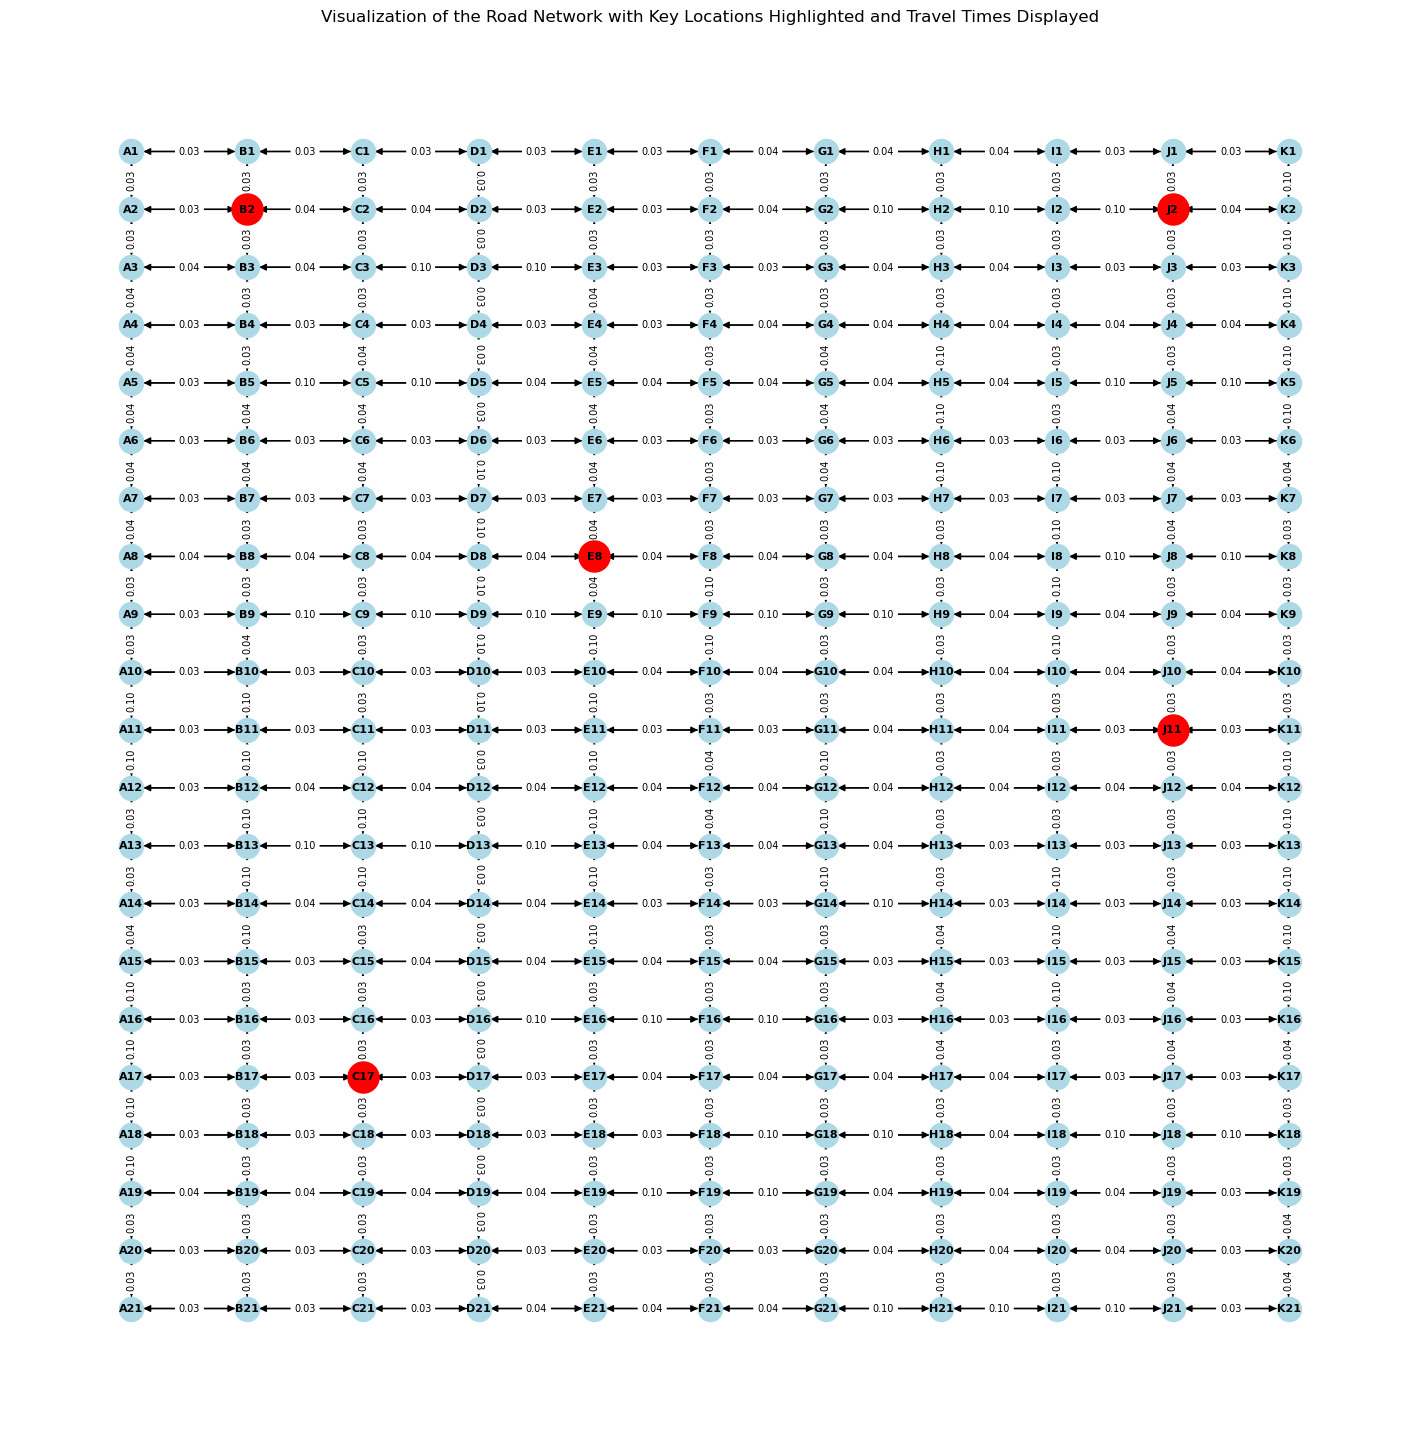

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Define key intersections based on their coordinates
location_map = {
    'A': 'B2',
    'B': 'J2',
    'C': 'E8',
    'D': 'J11',
    'H': 'C17'  # Starting point is 'H'
}

# Placeholder dictionary for road speeds based on color
# Update these speeds based on the map you provided
road_speeds = {
    # Horizontal Roads (Rows 1 to 21)
    'H_A1B1': 40, 'H_B1C1': 40, 'H_C1D1': 40, 'H_D1E1': 40, 'H_E1F1': 40, 
    'H_F1G1': 25, 'H_G1H1': 25, 'H_H1I1': 25, 'H_I1J1': 40, 'H_J1K1': 40,

    'H_A2B2': 40, 'H_B2C2': 25, 'H_C2D2': 25, 'H_D2E2': 40, 'H_E2F2': 40, 
    'H_F2G2': 25, 'H_G2H2': 10, 'H_H2I2': 10, 'H_I2J2': 10, 'H_J2K2': 25,

    'H_A3B3': 25, 'H_B3C3': 25, 'H_C3D3': 10, 'H_D3E3': 10, 'H_E3F3': 40, 
    'H_F3G3': 40, 'H_G3H3': 25, 'H_H3I3': 25, 'H_I3J3': 40, 'H_J3K3': 40,

    'H_A4B4': 40, 'H_B4C4': 40, 'H_C4D4': 40, 'H_D4E4': 40, 'H_E4F4': 40, 
    'H_F4G4': 25, 'H_G4H4': 25, 'H_H4I4': 25, 'H_I4J4': 25, 'H_J4K4': 25,

    'H_A5B5': 40, 'H_B5C5': 10, 'H_C5D5': 10, 'H_D5E5': 25, 'H_E5F5': 25, 
    'H_F5G5': 25, 'H_G5H5': 25, 'H_H5I5': 25, 'H_I5J5': 10, 'H_J5K5': 10,

    'H_A6B6': 40, 'H_B6C6': 40, 'H_C6D6': 40, 'H_D6E6': 40, 'H_E6F6': 40, 
    'H_F6G6': 40, 'H_G6H6': 40, 'H_H6I6': 40, 'H_I6J6': 40, 'H_J6K6': 40,

    'H_A7B7': 40, 'H_B7C7': 40, 'H_C7D7': 40, 'H_D7E7': 40, 'H_E7F7': 40, 
    'H_F7G7': 40, 'H_G7H7': 40, 'H_H7I7': 40, 'H_I7J7': 40, 'H_J7K7': 40,

    'H_A8B8': 25, 'H_B8C8': 25, 'H_C8D8': 25, 'H_D8E8': 25, 'H_E8F8': 25, 
    'H_F8G8': 25, 'H_G8H8': 25, 'H_H8I8': 25, 'H_I8J8': 10, 'H_J8K8': 10,

    'H_A9B9': 40, 'H_B9C9': 10, 'H_C9D9': 10, 'H_D9E9': 10, 'H_E9F9': 10, 
    'H_F9G9': 10, 'H_G9H9': 10, 'H_H9I9': 25, 'H_I9J9': 25, 'H_J9K9': 25,

    'H_A10B10': 40, 'H_B10C10': 40, 'H_C10D10': 40, 'H_D10E10': 40, 'H_E10F10': 25, 
    'H_F10G10': 25, 'H_G10H10': 25, 'H_H10I10': 25, 'H_I10J10': 25, 'H_J10K10': 25,

    'H_A11B11': 40, 'H_B11C11': 40, 'H_C11D11': 40, 'H_D11E11': 40, 'H_E11F11': 40, 
    'H_F11G11': 40, 'H_G11H11': 25, 'H_H11I11': 25, 'H_I11J11': 40, 'H_J11K11': 40,

    'H_A12B12': 40, 'H_B12C12': 25, 'H_C12D12': 25, 'H_D12E12': 25, 'H_E12F12': 25, 
    'H_F12G12': 25, 'H_G12H12': 25, 'H_H12I12': 25, 'H_I12J12': 25, 'H_J12K12': 25,

    'H_A13B13': 40, 'H_B13C13': 10, 'H_C13D13': 10, 'H_D13E13': 10, 'H_E13F13': 25, 
    'H_F13G13': 25, 'H_G13H13': 25, 'H_H13I13': 40, 'H_I13J13': 40, 'H_J13K13': 40,

    'H_A14B14': 40, 'H_B14C14': 25, 'H_C14D14': 25, 'H_D14E14': 25, 'H_E14F14': 40, 
    'H_F14G14': 40, 'H_G14H14': 10, 'H_H14I14': 40, 'H_I14J14': 40, 'H_J14K14': 40,

    'H_A15B15': 40, 'H_B15C15': 40, 'H_C15D15': 25, 'H_D15E15': 25, 'H_E15F15': 25, 
    'H_F15G15': 25, 'H_G15H15': 40, 'H_H15I15': 40, 'H_I15J15': 40, 'H_J15K15': 40,

    'H_A16B16': 40, 'H_B16C16': 40, 'H_C16D16': 40, 'H_D16E16': 10, 'H_E16F16': 10, 
    'H_F16G16': 10, 'H_G16H16': 40, 'H_H16I16': 40, 'H_I16J16': 40, 'H_J16K16': 40,

    'H_A17B17': 40, 'H_B17C17': 40, 'H_C17D17': 40, 'H_D17E17': 40, 'H_E17F17': 25, 
    'H_F17G17': 25, 'H_G17H17': 25, 'H_H17I17': 25, 'H_I17J17': 40, 'H_J17K17': 40,

    'H_A18B18': 40, 'H_B18C18': 40, 'H_C18D18': 40, 'H_D18E18': 40, 'H_E18F18': 40, 
    'H_F18G18': 10, 'H_G18H18': 10, 'H_H18I18': 25, 'H_I18J18': 10, 'H_J18K18': 10,

    'H_A19B19': 25, 'H_B19C19': 25, 'H_C19D19': 25, 'H_D19E19': 25, 'H_E19F19': 10, 
    'H_F19G19': 10, 'H_G19H19': 25, 'H_H19I19': 25, 'H_I19J19': 25, 'H_J19K19': 40,

    'H_A20B20': 40, 'H_B20C20': 40, 'H_C20D20': 40, 'H_D20E20': 40, 'H_E20F20': 40,
    'H_F20G20': 40, 'H_G20H20': 25, 'H_H20I20': 25, 'H_I20J20': 25, 'H_J20K20': 40,
    
    'H_A21B21': 40, 'H_B21C21': 40, 'H_C21D21': 40, 'H_D21E21': 25, 'H_E21F21': 25, 
    'H_F21G21': 25, 'H_G21H21': 10, 'H_H21I21': 10, 'H_I21J21': 10, 'H_J21K21': 40,

    # Vertical Roads (Columns A to K, Rows 1 to 21)
    'V_A1A2': 40, 'V_A2A3': 40, 'V_A3A4': 25, 'V_A4A5': 25, 'V_A5A6': 25, 
    'V_A6A7': 25, 'V_A7A8': 25, 'V_A8A9': 40, 'V_A9A10': 40, 'V_A10A11': 10,
    'V_A11A12': 10, 'V_A12A13': 40, 'V_A13A14': 40, 'V_A14A15': 25, 'V_A15A16': 10,
    'V_A16A17': 10, 'V_A17A18': 10, 'V_A18A19': 10, 'V_A19A20': 40, 'V_A20A21': 40,
    
    'V_B1B2': 40, 'V_B2B3': 40, 'V_B3B4': 40, 'V_B4B5': 40, 'V_B5B6': 25, 
    'V_B6B7': 25, 'V_B7B8': 40, 'V_B8B9': 40, 'V_B9B10': 25, 'V_B10B11': 10,
    'V_B11B12': 10, 'V_B12B13': 10, 'V_B13B14': 10, 'V_B14B15': 10, 'V_B15B16': 40,
    'V_B16B17': 40, 'V_B17B18': 40, 'V_B18B19': 40, 'V_B19B20': 40, 'V_B20B21': 40,
    
    'V_C1C2': 40, 'V_C2C3': 40, 'V_C3C4': 40, 'V_C4C5': 25, 'V_C5C6': 25, 
    'V_C6C7': 25, 'V_C7C8': 40, 'V_C8C9': 40, 'V_C9C10': 40, 'V_C10C11': 40,
    'V_C11C12': 10, 'V_C12C13': 10, 'V_C13C14': 10, 'V_C14C15': 40, 'V_C15C16': 40,
    'V_C16C17': 40, 'V_C17C18': 40, 'V_C18C19': 40, 'V_C19C20': 40, 'V_C20C21': 40,

    'V_D1D2': 40, 'V_D2D3': 40, 'V_D3D4': 40, 'V_D4D5': 40, 'V_D5D6': 40, 
    'V_D6D7': 10, 'V_D7D8': 10, 'V_D8D9': 10, 'V_D9D10': 10, 'V_D10D11': 10,
    'V_D11D12': 40, 'V_D12D13': 40, 'V_D13D14': 40, 'V_D14D15': 40, 'V_D15D16': 40,
    'V_D16D17': 40, 'V_D17D18': 40, 'V_D18D19': 40, 'V_D19D20': 40, 'V_D20D21': 40,

    'V_E1E2': 40, 'V_E2E3': 40, 'V_E3E4': 25, 'V_E4E5': 25, 'V_E5E6': 25, 
    'V_E6E7': 25, 'V_E7E8': 25, 'V_E8E9': 25, 'V_E9E10': 10, 'V_E10E11': 10,
    'V_E11E12': 10, 'V_E12E13': 10, 'V_E13E14': 10, 'V_E14E15': 10, 'V_E15E16': 40,
    'V_E16E17': 40, 'V_E17E18': 40, 'V_E18E19': 40, 'V_E19E20': 40, 'V_E20E21': 40,

    'V_F1F2': 40, 'V_F2F3': 40, 'V_F3F4': 40, 'V_F4F5': 40, 'V_F5F6': 40, 
    'V_F6F7': 40, 'V_F7F8': 40, 'V_F8F9': 10, 'V_F9F10': 10, 'V_F10F11': 40,
    'V_F11F12': 25, 'V_F12F13': 25, 'V_F13F14': 40, 'V_F14F15': 40, 'V_F15F16': 40,
    'V_F16F17': 40, 'V_F17F18': 40, 'V_F18F19': 40, 'V_F19F20': 40, 'V_F20F21': 40,

    'V_G1G2': 40, 'V_G2G3': 40, 'V_G3G4': 40, 'V_G4G5': 25, 'V_G5G6': 25, 
    'V_G6G7': 25, 'V_G7G8': 40, 'V_G8G9': 40, 'V_G9G10': 40, 'V_G10G11': 40,
    'V_G11G12': 10, 'V_G12G13': 10, 'V_G13G14': 10, 'V_G14G15': 40, 'V_G15G16': 40,
    'V_G16G17': 40, 'V_G17G18': 40, 'V_G18G19': 40, 'V_G19G20': 40, 'V_G20G21': 40,

    'V_H1H2': 40, 'V_H2H3': 40, 'V_H3H4': 40, 'V_H4H5': 10, 'V_H5H6': 10, 
    'V_H6H7': 10, 'V_H7H8': 40, 'V_H8H9': 40, 'V_H9H10': 40, 'V_H10H11': 40,
    'V_H11H12': 40, 'V_H12H13': 40, 'V_H13H14': 40, 'V_H14H15': 25, 'V_H15H16': 25,
    'V_H16H17': 25, 'V_H17H18': 40, 'V_H18H19': 40, 'V_H19H20': 40, 'V_H20H21': 40,

    'V_I1I2': 40, 'V_I2I3': 40, 'V_I3I4': 40, 'V_I4I5': 40, 'V_I5I6': 40, 
    'V_I6I7': 10, 'V_I7I8': 10, 'V_I8I9': 10, 'V_I9I10': 10, 'V_I10I11': 40,
    'V_I11I12': 40, 'V_I12I13': 40, 'V_I13I14': 10, 'V_I14I15': 10, 'V_I15I16': 10,
    'V_I16I17': 40, 'V_I17I18': 40, 'V_I18I19': 40, 'V_I19I20': 40, 'V_I20I21': 40,

    'V_J1J2': 40, 'V_J2J3': 40, 'V_J3J4': 40, 'V_J4J5': 40, 'V_J5J6': 25, 
    'V_J6J7': 25, 'V_J7J8': 25, 'V_J8J9': 40, 'V_J9J10': 40, 'V_J10J11': 40,
    'V_J11J12': 40, 'V_J12J13': 40, 'V_J13J14': 40, 'V_J14J15': 25, 'V_J15J16': 25,
    'V_J16J17': 25, 'V_J17J18': 40, 'V_J18J19': 40, 'V_J19J20': 40, 'V_J20J21': 40,

    'V_K1K2': 10, 'V_K2K3': 10, 'V_K3K4': 10, 'V_K4K5': 10, 'V_K5K6': 10, 
    'V_K6K7': 25, 'V_K7K8': 40, 'V_K8K9': 40, 'V_K9K10': 40, 'V_K10K11': 40,
    'V_K11K12': 10, 'V_K12K13': 10, 'V_K13K14': 10, 'V_K14K15': 10, 'V_K15K16': 10,
    'V_K16K17': 25, 'V_K17K18': 40, 'V_K18K19': 40, 'V_K19K20': 25, 'V_K20K21': 25
}


# Initialize the graph
G = nx.DiGraph()

# Add all nodes to the graph (A1 to K21)
for i in range(1, 22):
    for j in "ABCDEFGHIJK":
        node = f"{j}{i}"
        G.add_node(node)

# Add edges to the graph based on road IDs and speeds
DISTANCE_PER_SEGMENT = 1  # Each segment is 1 km

# Horizontal edges
for i in range(1, 22):
    for j in "ABCDEFGHIJ":
        start = f"{j}{i}"
        end = f"{chr(ord(j) + 1)}{i}"
        road_id = f"H_{start}{end}"
        speed = road_speeds.get(road_id, 40)  # Default to 40 km/hr if not specified
        travel_time = DISTANCE_PER_SEGMENT / speed
        G.add_edge(start, end, weight=travel_time)
        G.add_edge(end, start, weight=travel_time)  # Bidirectional

# Vertical edges
for i in range(1, 21):
    for j in "ABCDEFGHIJK":
        start = f"{j}{i}"
        end = f"{j}{i + 1}"
        road_id = f"V_{start}{end}"
        speed = road_speeds.get(road_id, 40)  # Default to 40 km/hr if not specified
        travel_time = DISTANCE_PER_SEGMENT / speed
        G.add_edge(start, end, weight=travel_time)
        G.add_edge(end, start, weight=travel_time)  # Bidirectional

# Define the starting and end points for the test
start_point = location_map['H']
end_points = [location_map['A'], location_map['B'], location_map['C'], location_map['D']]

# Calculate and display the shortest path from H to each target location
shortest_paths = {}
for end_point in end_points:
    try:
        length, path = nx.single_source_dijkstra(G, start_point, end_point, weight='weight')
        dest_label = [key for key, value in location_map.items() if value == end_point][0]
        shortest_paths[dest_label] = {'Time': length, 'Path': path}
    except nx.NetworkXNoPath:
        dest_label = [key for key, value in location_map.items() if value == end_point][0]
        shortest_paths[dest_label] = {'Time': float('inf'), 'Path': None}

# Display the results with 'H' as the start
for dest, info in shortest_paths.items():
    print(f"Shortest time from H to {dest}: {info['Time']} hours")
    if info['Path']:
        path_with_times = []
        for i in range(len(info['Path']) - 1):
            edge_start = info['Path'][i]
            edge_end = info['Path'][i + 1]
            travel_time = G[edge_start][edge_end]['weight']
            path_with_times.append(f"{edge_start} -> {edge_end} ({travel_time:.2f} hours)")
        path_str = " -> ".join(path_with_times)
        print(f"Path: {path_str}\n")
    else:
        print("Path: No path available\n")

# Visualization of the graph with highlighted nodes and travel times on edges
plt.figure(figsize=(14, 14))
pos = {f"{j}{i}": (ord(j) - 65, 22 - i) for i in range(1, 22) for j in "ABCDEFGHIJK"}
nx.draw(G, pos, with_labels=True, node_size=300, node_color='lightblue', font_size=8, font_weight="bold", arrows=True)

# Highlight specific nodes (A, B, C, D, and H)
highlight_nodes = set(location_map.values())
nx.draw_networkx_nodes(G, pos, nodelist=highlight_nodes, node_color='red', node_size=500)

# Display weights (travel times) on edges
edge_labels = {(u, v): f"{data['weight']:.2f}" for u, v, data in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7)

plt.title("Visualization of the Road Network with Key Locations Highlighted and Travel Times Displayed")
plt.show()

### Shortest Path Results

The results provide the shortest paths in terms of travel time from the starting point **H** (at C17) to the designated target locations **A**, **B**, **C**, and **D** on a color-coded traffic map. Each path lists the route through specific intersections, along with the travel time for each segment in hours.

Here’s an analysis and interpretation of the results:

**1. Route from H to A**
- **Path**: $C17 \to D17$ (0.03 hours) $\to D16$ (0.03 hours) $\to D15$ (0.03 hours) $\to D14$ (0.03 hours) $\to D13$ (0.03 hours) $\to D12$ (0.03 hours) $\to D11$ (0.03 hours) $\to C11$ (0.03 hours) $\to C10$ (0.03 hours) $\to C9$ (0.03 hours) $\to C8$ (0.03 hours) $\to C7$ (0.03 hours) $\to B7$ (0.03 hours) $\to B6$ (0.04 hours) $\to B5$ (0.04 hours) $\to B4$ (0.03 hours) $\to B3$ (0.03 hours) $\to B2$ (0.03 hours)
- **Time**: 0.480 hours --> 28.8 minutes

**2. Route from H to B**
- **Path**: $C17 \to D17$ (0.03 hours) $\to D16$ (0.03 hours) $\to D15$ (0.03 hours) $\to D14$ (0.03 hours) $\to D13$ (0.03 hours) $\to D12$ (0.03 hours) $\to D11$ (0.03 hours) $\to E11$ (0.03 hours) $\to F11$ (0.03 hours) $\to G11$ (0.03 hours) $\to G10$ (0.03 hours) $\to G9$ (0.03 hours) $\to G8$ (0.03 hours) $\to G7$ (0.03 hours) $\to G6$ (0.04 hours) $\to H6$ (0.03 hours) $\to I6$ (0.03 hours) $\to I5$ (0.03 hours) $\to I4$ (0.03 hours) $\to I3$ (0.03 hours) $\to J3$ (0.03 hours) $\to J2$ (0.03 hours)
- **Time**: 0.565 hours --> 33.9 minutes

**3. Route from H to C**
- **Path**: $C17 \to D17$ (0.03 hours) $\to D16$ (0.03 hours) $\to D15$ (0.03 hours) $\to D14$ (0.03 hours) $\to D13$ (0.03 hours) $\to D12$ (0.03 hours) $\to D11$ (0.03 hours) $\to C11$ (0.03 hours) $\to C10$ (0.03 hours) $\to C9$ (0.03 hours) $\to C8$ (0.03 hours) $\to D8$ (0.04 hours) $\to E8$ (0.04 hours)
- **Time**: 0.355 hours --> 21.3 minutes

**4. Route from H to D**
- **Path**: $C17 \to D17$ (0.03 hours) $\to D16$ (0.03 hours) $\to D15$ (0.03 hours) $\to D14$ (0.03 hours) $\to D13$ (0.03 hours) $\to D12$ (0.03 hours) $\to D11$ (0.03 hours) $\to E11$ (0.03 hours) $\to F11$ (0.03 hours) $\to G11$ (0.03 hours) $\to H11$ (0.04 hours) $\to I11$ (0.04 hours) $\to J11$ (0.03 hours)
- **Time**: 0.355 hours --> 21.3 minutes

The Dijkstra algorithm optimally selects paths that balance distance and travel speed. Each route prioritizes segments with higher speeds to minimize total travel time. 





